# Introduction
In this notebook we will cover several topics:
- Logistic Regression
- Support Vector Machines (linear)

We will start of with a synthetic dataset to compare the different methods. All models are linear models and work with linear data. Support Vector Machines can work with non-linear data, but we will get into that later.

# Logistic Regression
Logistic regression is a classification technique. It is also known as logit-regression. It outputs probabilities which are modeled using a logistic function. 

Scikit-learn provides the `LogisticRegression` class for classification. It is able to fit binary, One-vs-Rest, or multinomial logistic regression. You have the option to set $l_1$, $l_2$, or Elastic-Net (both) regularization.

For an extensive description, see the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">documentation</a> or <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression" target="_blank">user guide</a>

In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. I will summarizing some important aspects of the mentioned function.

### Logistic Function
A logistic function or logistic curve is a common S-shaped curve (sigmoid curve) with equation 

$$
f(x) = \frac{L}{1 + e^{-k \cdot (x-x_0)}}\
$$

where
1. x0, the x value of the function's midpoint;
2. L , the supremum of the values of the function;
3. k , the logistic growth rate or steepness of the curve.

The logistic function finds applications in a range of fields, including biology (especially ecology), biomathematics, chemistry, demography, economics, geoscience, mathematical psychology, probability, sociology, political science, linguistics, statistics, and artificial neural networks. A generalization of the logistic function is the hyperbolastic function of type I. [<a href="https://en.wikipedia.org/wiki/Logistic_function" target="_blank">wiki</a>]

In sklearn.LogisticRegression, Regularization is done as the default setting, so it seems it can be is necessary to know about its properties. Consequently in the next step I will shortly describe this concept.

### Regularization
One crucial aspect of training a machine learning model is to prevent overfitting. When a model overfits, its accuracy is negatively affected. This occurs when the model excessively focuses on capturing the noise present in the training dataset. By noise, we refer to data points that do not genuinely reflect the true characteristics of the data, but rather arise from random chance. Incorporating such data points into the learning process enhances the model's adaptability but increases the likelihood of overfitting.

Understanding the phenomenon of overfitting becomes clearer when considering the concept of balancing bias and variance. In the handout of this section, I explained these two concepts fully.

Anothe method is Cross-validation which is a valuable technique for mitigating overfitting as it aids in estimating the error on a test set and determining the optimal parameters for your model. I extensively explain this concept through the handout, so for further explanation one can refer to the mentioned document.

This technique (regularization) is a form of regression that applies constraints or shrinkage to the coefficient estimates, driving them towards zero. In essence, it discourages the model from learning excessive complexity or flexibility, thereby mitigating the potential for overfitting. This techniques has a quite important coefficient λ that is the tuning parameter that decides how much we want to penalize the flexibility of our model When the value of λ is set to 0 in ridge regression, the penalty term has no effect, resulting in coefficient estimates that are equivalent to those obtained through ordinary least squares. Conversely, as the value of λ approaches infinity, the impact of the shrinkage penalty increases, causing the ridge regression coefficient estimates to approach zero. Hence, the selection of an appropriate value for λ is crucial in achieving desirable results.

Regulation is divided into two techniques, one is Ridge Regression (also called L2) and another one is Lasso (also called L1). the first technique uses square of the parameter to control flexibility of the model, while the later utilizes the absolute value of the parameters to panelize the flexibility. One drawback of ridge regression is its impact on model interpretability. It tends to shrink the coefficients of less important predictors towards zero, but it never eliminates them entirely. As a result, the final model includes all predictors. In contrast, the lasso method, which incorporates an L1 penalty, has the ability to force certain coefficient estimates to become exactly zero when the tuning parameter λ is sufficiently large. Consequently, the lasso method facilitates variable selection and produces sparse models.

In conclusion, Regularization plays a crucial role in effectively managing the bias-variance trade-off of a model. By using the tuning parameter λ in the aforementioned regularization techniques, it is possible to control the impact on both bias and variance. As the value of λ increases, the coefficients are reduced, leading to a decrease in variance. Up to a certain threshold, this increase in λ proves beneficial by solely reducing variance and preventing overfitting, without sacrificing important properties inherent in the data. However, beyond a certain point, the model begins to lose those important properties, resulting in increased bias and underfitting. Hence, the value of λ should be chosen diligently to strike the right balance.

For further study and mathematical explanation of the mentioned method one can visit this <a href="https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a" target="_blank">link</a>.

As it is mentioned above, the method can fit binary, One-vs-Rest, or multinomial logistic regression, so I will explain these methods here.

### Binary Case 
In scikit-learn, the LogisticRegression class supports binary classification by default. It uses a logistic function (also known as the sigmoid function) to map the input features to probabilities of the positive class. The decision boundary is determined based on a threshold value (usually 0.5), where predictions with probabilities above the threshold are assigned to the positive class, and predictions below the threshold are assigned to the negative class. In this specific case, there are only two classes.

###  Multinomial Logistic Regression
Multinomial logistic regression is a statistical classification method that extends logistic regression to handle multiclass problems, where there are more than two possible discrete outcomes. It is a predictive model used to estimate the probabilities of various outcomes for a dependent variable that follows a categorical distribution. This is achieved by considering a set of independent variables, which can be real-valued, binary-valued, categorical-valued, and so on. [[<a href="https://en.wikipedia.org/wiki/Multinomial_logistic_regression#As_a_log-linear_model" target="_blank">wiki</a>]]

### One-vs-Rest
The One-vs-Rest (OvR) method, also known as One-vs-All, is a strategy used in multiclass logistic regression (and other multiclass classification algorithms) to handle problems with multiple classes. In contrast to Multinomial method that directly models the probabilities of multiple classes without decomposing the problem into binary subproblems, In OvR, a separate binary logistic regression model is trained for each class, treating it as the positive class, while considering all other classes as the negative class. This results in a set of binary classifiers, where each classifier is responsible for distinguishing one class from the rest. The OvR method is effective for multiclass problems because it allows logistic regression, which is inherently a binary classification algorithm, to be extended to handle multiple classes. It simplifies the multiclass problem by breaking it down into a series of binary classification subproblems.

The last part of this explanation is about 'solvers'.

### Solvers
the solver parameter refers to the algorithm used to solve the optimization problem when fitting the logistic regression model. The choice of solver can impact the computational efficiency and accuracy of the model. LogisticRegression offers a group of solvers that I will shortly describe them below. for further explanation please click on this <a href="https://scikit-learn.org/stable/modules/linear_model.html#id36" target="_blank">link</a>.

#### 'liblinear':
This solver is a good choice for small-to-medium-sized datasets and supports both binary and multiclass problems. It is based on the LIBLINEAR library and uses a coordinate descent algorithm.

#### 'newton-cg':
This solver uses the Newton-CG method, which is a variant of Newton's method with conjugate gradient optimization. It is suitable for both binary and multiclass problems, but it may have difficulties with large datasets.

#### 'lbfgs':
The Limited-memory Broyden-Fletcher-Goldfarb-Shanno (LBFGS) solver approximates the inverse Hessian matrix using a limited memory approach. It is effective for small-to-medium-sized problems and works well for both binary and multiclass classification.

#### 'sag': 
The Stochastic Average Gradient (SAG) solver is designed for large-scale problems. It utilizes a stochastic average approximation approach and can handle both binary and multiclass cases.

#### 'saga': 
The SAGA solver is an extension of the SAG solver. It supports L1 regularization and is suitable for large-scale problems with both binary and multiclass classification.

The table on the above link shows one how to use these solvers.

Important last tip: LogisticRegressionCV implements Logistic Regression with built-in cross-validation support, to find the optimal C and l1_ratio parameters according to the scoring attribute. The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data, due to warm-starting

# Support Vector Machines (SVMs)
SVMs are a set of supervised methods that can be used for classification, regression and outlier detection. In this notebook, we will focus on classification.

Advantages:
- Effective in high dimensional spaces.
- Can still be effective when the number of features are bigger than the number of samples.
- Memory efficient.
- Different types of kernels, although we will focus on linear kernels.

Disadvantages:
- If the number of features is greater than the number of samples, regularization is critical to prevent overfitting.
- SVMs do not directly provide probability estimates, such as with logistic regression.

There are different types of SVMs. Scikit-learn provides several for classification:
- `SVC`: implementation based on *libsvm*. Fit time scales at quadratically.
- `NuSVC`: similar to `SVC` but controls the number of support vectors.
- `LinearSVC`: fast implementation for linear kernel.

In our case it is easiest to use LinearSVC, but feel free to play around with other configurations.

For an extensive description, see the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm" target="_blank">documentation</a> or <a href="https://scikit-learn.org/stable/modules/svm.html#svm" target="_blank">user guide</a>

I will not go into detail of this method here since this method is explained extensively in the handout file.

The last concept that I want to explain here is Grid Search.

Generally each classification method  should follow  a set of actions (stages) to make the best model. Here I will explain these stages using SVM as an example. The stages are as follow

1. Data Preparation: Collect and preprocess the dataset. This includes data cleaning, handling missing values, and feature scaling, if necessary.

2. Feature Selection/Extraction: Choose relevant features from the dataset or perform feature extraction techniques to transform the data into a suitable format for SVM.

3. Splitting the Data: Divide the dataset into training and testing sets. The training set is used to train the SVM model, while the testing set is used to evaluate its performance.

4. Model Training: Train the SVM model using the training data. This involves finding the optimal hyperplane that maximizes the margin between different classes or minimizes the classification error.

5. Model Selection: Choose the appropriate type of SVM (e.g., linear SVM, kernel SVM) and tune the hyperparameters (e.g., kernel type, regularization parameter) using techniques like cross-validation or grid search.

6. Model Evaluation: Evaluate the trained SVM model on the testing data to assess its performance. Common evaluation metrics for classification tasks include accuracy, precision, recall, F1 score, and ROC curve.

7. Model Fine-tuning: If the model's performance is not satisfactory, you can experiment with different hyperparameter values or try different kernel functions to improve the results.

8. Model Deployment: Once you are satisfied with the SVM model's performance, you can deploy it to make predictions on new, unseen data.

The only steps that are different for different classificarion methods are four and five since the models and the hyperparameters  are different from each other.

# Grid Search
The majority of machine learning models contain parameters that can be adjusted to vary how the model learns. For example, the logistic regression model, from sklearn, has a parameter C that controls regularization,which affects the complexity of the model.

How do we pick the best value for C? The best value is dependent on the data used to train the model. One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search. If we had to select the values for two or more parameters, we would evaluate all combinations of the sets of values thus forming a grid of values.

Before we get into the example it is good to know what the parameter we are changing does. Higher values of C tell the model, the training data resembles real world information, place a greater weight on the training data. While lower values of C do the opposite. 

To see the example and find more explanation click on this <a href="https://www.w3schools.com/python/python_ml_grid_search.asp" target="_blank">link</a>.


# Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

### Create dataset with linear signals
Let's create a linear dataset for demonstration purposes and look at the classification performance.

#### make_classification
This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html" target="_blank">documentation</a>

Data split:
- Training set: first 100 samples
- Test set: last 100 samples

In [53]:
X, y = make_classification(n_samples=200, # number of samples
                           n_features=2, # total number of  features
                           n_informative=2, # number of informative feature
                           n_redundant=0, # number of redundant features
                           random_state=0, # determines random number generation
                           shuffle=True) # Shuffle the samples and the features.

print(X.shape, y.shape)

(200, 2) (200,)


<function matplotlib.pyplot.show(close=None, block=None)>

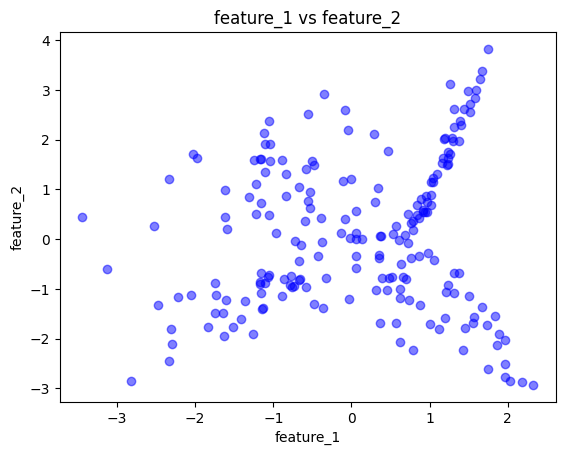

In [54]:
# plot the dataset for a better understanding
fig = plt.figure()
plt.scatter( X[:, 0], X[:, 1], c='b', alpha=0.5)
plt.title('feature_1 vs feature_2')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show

In [55]:
# find the number of members in each class
print(f'{np.unique(y, return_counts=True)}')

# Find the extermums of the dataset
print(X.min(), X.max())

# dived the data into two halves. One for training and another one for testing
X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

(array([0, 1]), array([100, 100], dtype=int64))
-3.4423002664236364 3.8246288578434964


##### Setup models

In [56]:
# make the models
lr = LogisticRegression()
svm = LinearSVC(C=1)

In [6]:
# train the models by using training data
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC(C=1)

One can plot support vectors and decision boundary to see how much this model based on the magnitude of C can act better. LinearSVC does not support the calculation of support vectors; consequently, one should calculate them manually.

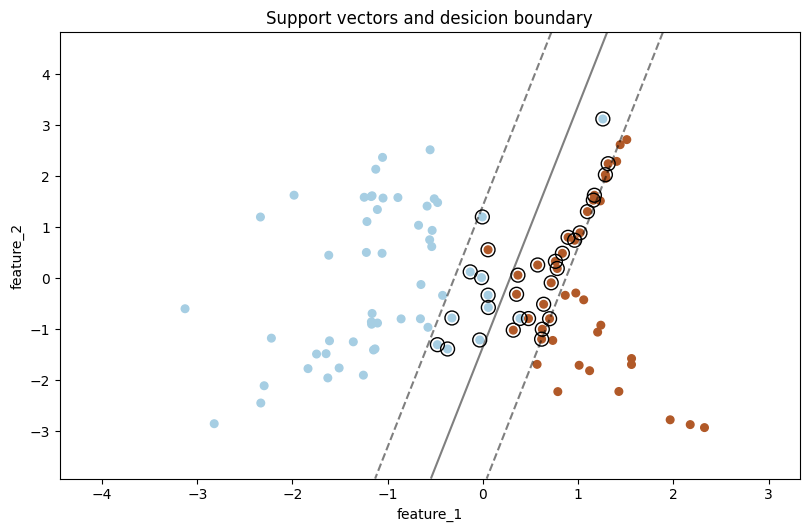

In [7]:
# Using this link 
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py

from sklearn.inspection import DecisionBoundaryDisplay

# Predict confidence scores for training samples.
decision_values = svm.decision_function(X_train)

plt.figure(figsize=(8, 5))
# The support vectors are the samples that lie within the margin
# boundaries, whose size is conventionally constrained to 1
support_vector_indices = np.where(np.abs(decision_values) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

#plt.subplot(1, 2, i + 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
#plt.title("C=" + str(C))
plt.tight_layout()
plt.title('Support vectors and desicion boundary')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

##### Contours

In [57]:
def make_meshgrid(X, h=.01):
    """
    Create a mesh grid based on vectors X and Y. This meshgrid will 
    used in some visualizations such as vontour plots
    """
    if X.shape[1] > 2:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
    
    # Return a list of coordinate matrices from coordinate vectors.
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy


In [58]:
# make the meshgrid 
xx, yy = make_meshgrid(X)

#--------------------------------------
# np.array.ravel(): returns contiguous flattened array(1D array with all the input-array 
#                   elements and with the same type as it).
#  np.c_: add along second axis.
#--------------------------------------

# make the grid
grid = np.c_[xx.ravel(), yy.ravel()] 

In [59]:
grid.shape

(859329, 2)

In [11]:
# get the predictions, svm does not have probabilities, only confidence intervals
# The returned estimates for all classes are ordered by the label of classes.
# then reshape it again into the form of meshgrid
lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

# Predict class labels for samples in X.
svm_pred = svm.predict(grid).reshape(xx.shape)

In [12]:
# find the values of the testing data point within the margin area
decision_values_model = svm.decision_function(grid).reshape(xx.shape)

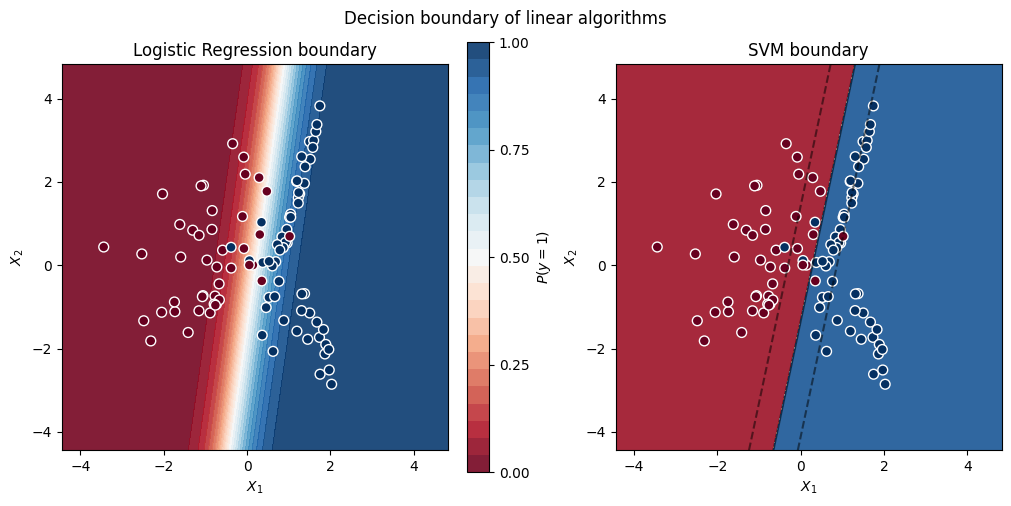

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")

fig.suptitle('Decision boundary of linear algorithms')

# flatten for easier manipulation
axes.ravel()

# logistic regression
contour = axes[0].contourf(xx, yy, lr_prob, 25, cmap=plt.cm.RdBu, alpha=0.9)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
axes[0].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[0].set_title('Logistic Regression boundary')

# SVM
axes[1].contourf(xx, yy, svm_pred, cmap=plt.cm.RdBu, alpha=0.9)

# decision boundaries
axes[1].contour(xx, yy, decision_values_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)

axes[1].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[1].set_title('SVM boundary')

plt.show()

We can clearly see that linear algorithms are exceptionally good at separating linear signals. What would happen if we have a dataset with non-linear signals?

In [62]:
# Make two interleaving half circles.
X, y = make_moons(n_samples=200, random_state=0, shuffle=True)

X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

In [15]:
lr = LogisticRegression()
svm = LinearSVC()

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC()

In [16]:
xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]

lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
svm_pred = svm.predict(grid).reshape(xx.shape)

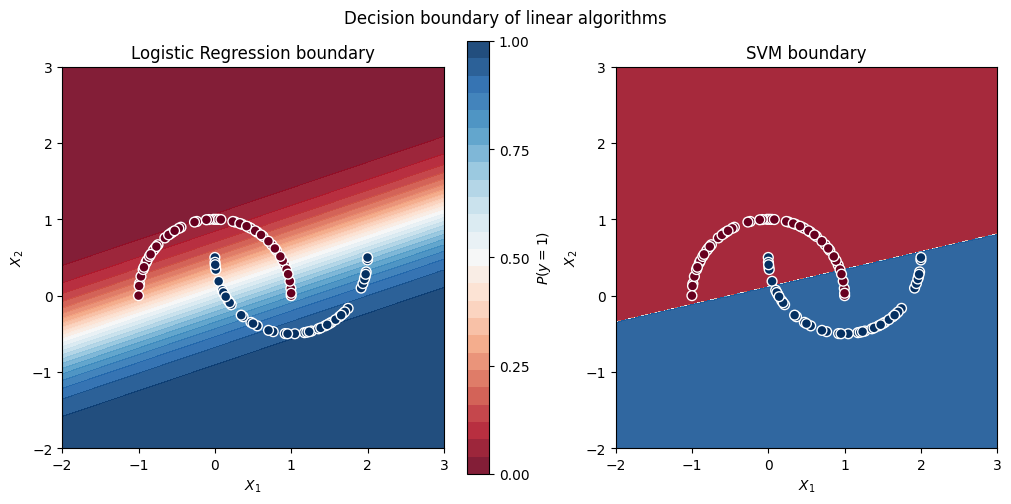

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout="constrained")

fig.suptitle('Decision boundary of linear algorithms')

# flatten for easier manipulation
axes.ravel()

# logistic regression
contour = axes[0].contourf(xx, yy, lr_prob, 25, cmap=plt.cm.RdBu, alpha=0.9)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
axes[0].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[0].set_title('Logistic Regression boundary')

# SVM
axes[1].contourf(xx, yy, svm_pred, cmap=plt.cm.RdBu, alpha=0.9)
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
axes[1].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[1].set_title('SVM boundary')

plt.show()

We can clearly see that linear models are unable to separate non-linear signals. This results in inaccurate representations. It is important to understand that different models are useful in different situations. Most real life dataset contain a mixture of linear and non-linear signals.

**Conclusion**:
- Linear models are exceptionally good in separating linear-signals.
- We need other methods to separate non-linear signals.

To continue I will try some non-linear models. none linear models can be divided into different categories but two of them are SVM models with different kernels one with 'rbf' and another one with polynomial kernels. each of them has their own distinct mathematical and logical background that make them useful in different situations. 

In [18]:
non_linear_svc = SVC(kernel='rbf')
non_linear_svc.fit(X_train, y_train)
svm_pred = non_linear_svc.predict(grid).reshape(xx.shape)

# find the values of the testing data point within the margin area
decision_values_model = non_linear_svc.decision_function(grid).reshape(xx.shape)

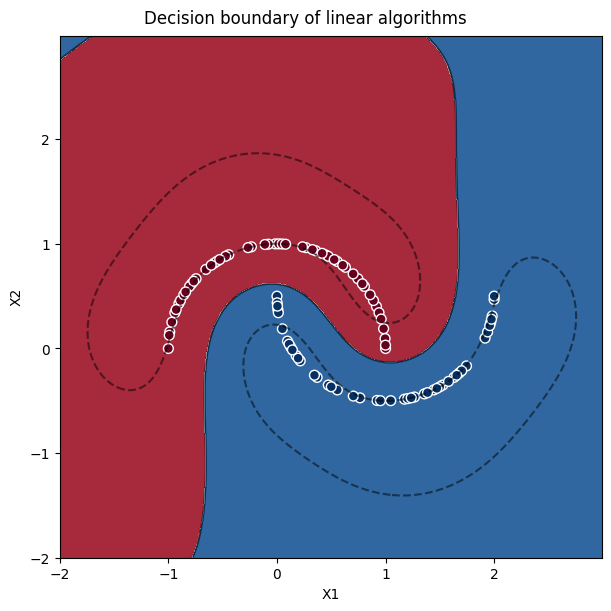

In [19]:
fig = plt.figure( figsize=(6, 6), layout="constrained")

fig.suptitle('Decision boundary of linear algorithms')


# SVM
plt.contourf(xx, yy, svm_pred, cmap=plt.cm.RdBu, alpha=0.9)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
# decision boundaries
plt.contour(xx, yy, decision_values_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In cases where the data is completely separated nonlinearly, the 'rbf' kernel is often the optimal choice. This is because the 'rbf' kernel maps the data to an infinite number of dimensions using Infinitely Smooth Radial Basis Functions. This high-dimensional mapping provides greater flexibility in separating clusters with complex non-linear patterns, surpassing the limitations of polynomial functions that use a limited number of dimensions for mapping. Additionally, the 'rbf' kernel treats each data point as the center of a Gaussian-like function, and the similarity or distance is determined by the value of the Gaussian function at each point. By assigning higher weights to closer data points and decreasing weights as distance increases, the 'rbf' kernel exhibits enhanced flexibility. On the other hand, the polynomial kernel treats all points with the same weight, which limits its ability to capture intricate relationships in the data.

To continue this notebook, one can study about non-linear form of logistic regression.

In [20]:
lr = LogisticRegression(solver='newton-cholesky')
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

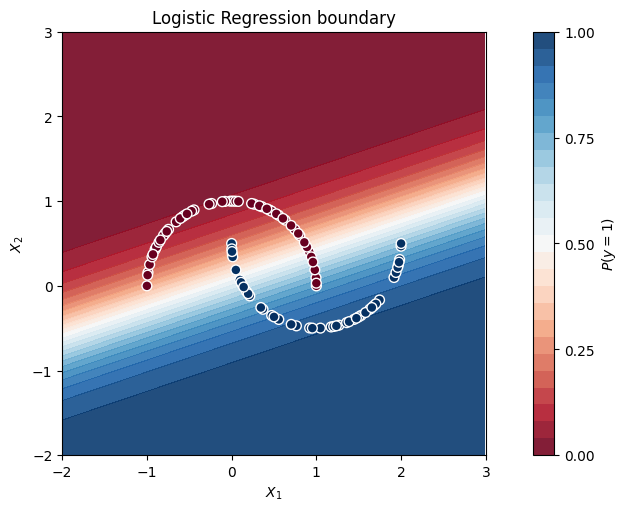

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), layout="constrained")

# flatten for easier manipulation
#axes.ravel()

# logistic regression
contour = axes.contourf(xx, yy, lr_prob, 25, cmap=plt.cm.RdBu, alpha=0.9)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
axes.set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes.set_title('Logistic Regression boundary')

plt.show()

As it can be seen the logistic regression canat divide the clusters properly from each other the reason is that this method is designed to act on linear datasets. Consequently, there are two ways that one can use logistic regression to deal with non-linear datasets.

The first method is to map the features to higher dimensions in order to capture non-linear relationships between the predictors and the target variables. This can be achieved using modules like sklearn.PolynomialFeatures, which maps the features to a higher degree space using polynomial metrics. This process is analogous to the feature mapping performed in SVM, but in this case, the mapping needs to be done manually.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial transformer
poly_transformer = PolynomialFeatures(degree=5)

# Fit and transform the training features
X_train_poly = poly_transformer.fit_transform(X_train)

# Transform the testing features
X_test_poly = poly_transformer.transform(X_test)

X_mesh_poly = poly_transformer.transform(grid)

In [23]:
# Create an instance of the logistic regression model
lr = LogisticRegression()

# Fit the model to the polynomial features
lr.fit(X_train_poly, y_train)
lr_pred = lr.predict(X_test_poly)
lr_prob = lr.predict_proba(X_mesh_poly)[:, 1].reshape(xx.shape)

Text(0.5, 1.0, 'Logistic Regression boundary')

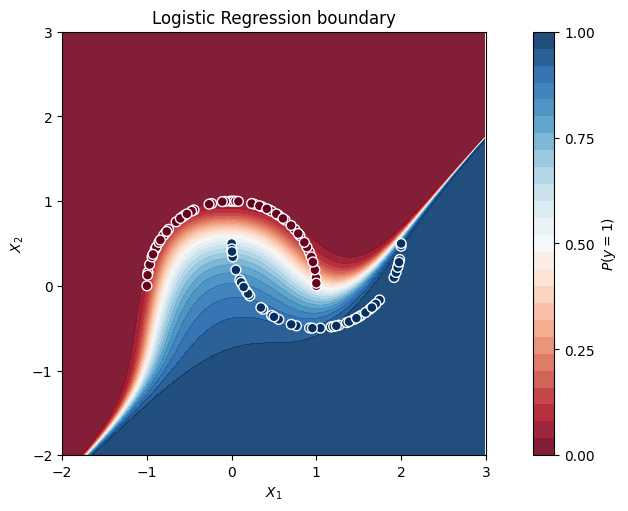

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), layout="constrained")

# flatten for easier manipulation
#axes.ravel()

# logistic regression
contour = axes.contourf(xx, yy, lr_prob, 25, cmap=plt.cm.RdBu, alpha=0.9)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
axes.set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes.set_title('Logistic Regression boundary')

Another approach to handle non-linear relationships is by using Generalized Additive Models (GAMs). GAMs are a type of generalized linear model where the linear response variable depends on unknown smooth functions of the predictor variables. The focus is on inferring these smooth functions. In GAMs, a univariate response variable Y is related to predictor variables xi. The response variable Y follows an exponential family distribution, such as normal, binomial, or Poisson distributions, and is linked to the predictor variables through a link function g, such as the identity or logarithmic function. GAMs allow for flexible modeling of non-linear relationships between the predictors and the response variable by incorporating these smooth functions. This approach provides a powerful tool for capturing complex relationships and making inferences about the effects of predictors in a non-linear framework. [<a href="https://en.wikipedia.org/wiki/Generalized_additive_model" target="_blank">wiki</a>]

In addition, GAMs offer an extension to logistic regression by accommodating non-linear relationships using smooth functions. In this educational notebook, I will demonstrate the implementation of this technique for non-linear datasets using the pyGAM library. With pyGAM, we can easily incorporate smooth functions to capture complex and non-linear patterns in the data, thereby enhancing the predictive power of logistic regression.




In [63]:
from pygam import LogisticGAM

In [64]:
model = LogisticGAM()
fitted_model = model.fit(X_train, y_train)
predictions = fitted_model.predict(X_test)
lr_prob = model.predict_proba(grid).reshape(xx.shape)

Text(0.5, 1.0, 'GAMs boundary')

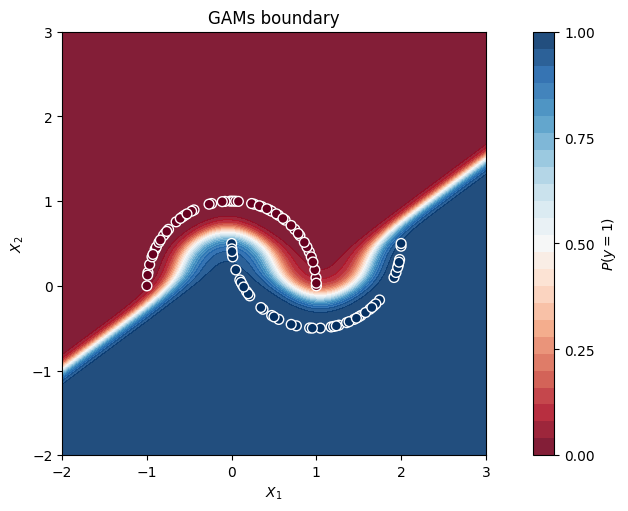

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), layout="constrained")

# flatten for easier manipulation
#axes.ravel()

# logistic regression
contour = axes.contourf(xx, yy, lr_prob, 25, cmap=plt.cm.RdBu, alpha=0.9)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)
axes.set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes.set_title('GAMs boundary')

Both of these methods demonstrate good consistency with this non-linear dataset. However, relying solely on visual plots to assess the validity of a model's predictions may not be the most robust approach. Therefore, in the subsequent section, I will discuss various evaluation methods commonly used to assess the performance of a classification model.